In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
df=load_diabetes()


In [4]:
df_diabetics=pd.DataFrame(df.data,columns=df.feature_names)

In [5]:
df_diabetics['disease']=df.target

In [6]:
df_diabetics.columns.values

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'disease'], dtype=object)

In [7]:
df_diabetics.head(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0


In [81]:
from sklearn.preprocessing import normalize,scale,MinMaxScaler


In [9]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,median_absolute_error,mean_squared_error

In [92]:
x_train,x_test,y_train,y_test=train_test_split(df_diabetics.drop(columns='disease'),df_diabetics['disease'],test_size=0.33, random_state=42)

In [44]:
def normalize1(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('disease')) :
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1



In [93]:
#x_train=normalize(x_train)
#x_test=normalize(x_test)
#x_train=scale(x_train)
#x_test=scale(x_test)
min_max_scaler=MinMaxScaler()
x_train=min_max_scaler.fit_transform(x_train)
x_test=min_max_scaler.transform(x_test)

In [94]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(296, 10) (146, 10) (296,) (146,)


In [95]:
#x_train['age'].min()
x_train.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [96]:
lr=SGDRegressor(max_iter=1000)
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)

In [97]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE:",mean_squared_error(y_test,pred1))
print("R2 Score:",r2_score(y_test,pred1))
print("median_absolute_error",median_absolute_error(y_test,pred1))

MSE: 2832.2323243915253
R2 Score: 0.507888023432759
median_absolute_error 35.060249829673964


In [98]:
lr1=LinearRegression()
lr1.fit(x_train,y_train)
pred2=lr1.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred2))
print("R2 Score:",r2_score(y_test,pred2))
print("median_absolute_error",median_absolute_error(y_test,pred2))

MSE: 2817.801570168678
R2 Score: 0.5103954261351439
median_absolute_error 34.277441083095695


In [99]:
knn=KNeighborsRegressor()
MSE_score=[]
for i in range(1,20,2):
    knn=KNeighborsRegressor(n_neighbors=i)
    scores=cross_val_score(knn,x_train,y_train,cv=10)
    avg=scores.mean()
    MSE=1-avg
    MSE_score.append(MSE)
   
    

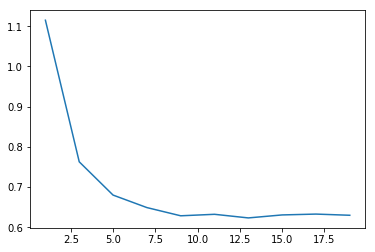

In [100]:
k_range=list(range(1,20,2))
plt.plot(k_range,MSE_score)
plt.show()

In [101]:
optimal_k=k_range[np.argmin(MSE_score)]
knn=KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred3))
print("R2 Score:",r2_score(y_test,pred3))
print("median_absolute_error",median_absolute_error(y_test,pred3))

MSE: 3121.7557753100427
R2 Score: 0.45758213698868344
median_absolute_error 38.11538461538461


In [62]:
#C = [10 ** x for x in range(-6, 3)]
n_estimators_range = [10,100,200,500,1000,2000]
max_depth_range = [5, 20]
param_grid = {'n_estimators':n_estimators_range,'max_depth':max_depth_range}
grid = GridSearchCV(RandomForestRegressor(), param_grid,cv=10,scoring = 'neg_median_absolute_error')


In [63]:
grid.fit(x_train,y_train)
print(grid.best_params_)
optimal_n_estimators=grid.best_params_['n_estimators']
optimal_max_depth=grid.best_params_['max_depth']

KeyboardInterrupt: 

In [ ]:
rf=RandomForestRegressor(n_estimators=optimal_n_estimators,max_depth=optimal_max_depth)
rf.fit(x_train,y_train)
pred4=rf.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred4))
print("R2 Score:",r2_score(y_test,pred4))
print("median_absolute_error",median_absolute_error(y_test,pred4))

In [58]:
C = [10 ** x for x in range(-5, 1)]
param_grid = {'C':C}
grid = GridSearchCV(LinearSVR(), param_grid,cv=10,scoring = 'neg_median_absolute_error')
grid.fit(x_train,y_train)
print(grid.best_params_)
best_C=grid.best_params_['C']

{'C': 1}


In [63]:
l_svr=LinearSVR(C=best_C)
l_svr.fit(x_train,y_train)
pred5=l_svr.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred5))
print("R2 Score:",r2_score(y_test,pred5))
print("median_absolute_error",median_absolute_error(y_test,pred5))

MSE: 8192.264308163762
R2 Score: -0.42343950619158965
median_absolute_error 49.6929939758929


In [66]:
C_range = [10 ** x for x in range(-5, 3)]
gamma_range= [10 ** x for x in range(-5, 3)]
param_grid = {'C':C_range,'gamma':gamma_range}
grid = GridSearchCV(SVR(), param_grid,cv=10,scoring = 'neg_median_absolute_error')
grid.fit(x_train,y_train)
print(grid.best_params_)


{'C': 100, 'gamma': 10}


In [69]:
best_C=grid.best_params_['C']
best_gamma=grid.best_params_['gamma']
svr=SVR(C=best_C,gamma=best_gamma)
svr.fit(x_train,y_train)
pred6=l_svr.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred6))
print("R2 Score:",r2_score(y_test,pred6))
print("median_absolute_error",median_absolute_error(y_test,pred6))

MSE: 8192.264308163762
R2 Score: -0.42343950619158965
median_absolute_error 49.6929939758929


In [71]:
#C = [10 ** x for x in range(-6, 3)]
n_estimators_range = [10,100,200,500,1000,2000]
max_depth_range = [5,8,10]
param_grid = {'n_estimators':n_estimators_range,'max_depth':max_depth_range}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid,cv=10,scoring = 'neg_median_absolute_error')
grid.fit(x_train,y_train)
print(grid.best_params_)
optimal_n_estimators=grid.best_params_['n_estimators']
optimal_max_depth=grid.best_params_['max_depth']


{'max_depth': 5, 'n_estimators': 500}


In [72]:
gbr=GradientBoostingRegressor(n_estimators=optimal_n_estimators,max_depth=optimal_max_depth)
gbr.fit(x_train,y_train)
pred7=gbr.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred7))
print("R2 Score:",r2_score(y_test,pred7))
print("median_absolute_error",median_absolute_error(y_test,pred7))

MSE: 3915.626553649499
R2 Score: 0.319643834928122
median_absolute_error 41.69737152595527
